# NHL Player Preprocessing

This file is used to preprocess the NHL player data.

- Exclude Rookies

    - Only include players who surpass rookie eligibility (Calder Memorial Trophy) limits:

        - played $\geq 25$ NHL games in a single season, or

        - In modern practice, only NHL experience is practically considered.

            - International pro league (KHL, SHL, Liiga, etc.) do *not disqualify* players from Calder Trophy eligibility.

        - players must be 26 years old or younger by September 15th of the season in question.

- Exclude Fringe Players

    - Min 2 seasons in NHL.

    - At least 41 `gp_regular_max_per_season` in one regular season.

- Divide players by position (player_pos_official) -> (FW, D)


## Import Libraries

In [71]:
import pandas as pd
import numpy as np
import os

## Read in Data

In [72]:
# Load players' metadata
nhl_players_metadata = pd.read_csv('../dataset/nhl_players_metadata_facts_merged_final.csv')
nhl_players_stats = pd.read_csv('../dataset/nhl_players_official_stats_with_id_sorted.csv')

In [73]:
nhl_players_metadata

,player_id,player_name_official,player_name_ep,player_pos_official,player_pos_ep,player_link_official,player_link_ep,player_image_official,date_of_birth,nation,height_cm,weight_kg,shoots,player_type,nhl_rights,draft,highlights,description
0,1,Joe Sakic,Joe Sakic,C,C,https://www.nhl.com/player/8451101,https://www.eliteprospects.com/player/8862/joe...,https://assets.nhle.com/mugs/nhl/latest/845110...,7/7/1969,Canada,180,88,L,NaN,NaN,"('1', '15', '1987')","['1-time U20 WJC Gold Medal', '1-time World Ch...",Brother: Brian Sakic\r\nSons: Chase Sakic & Mi...
1,2,Peter Forsberg,Peter Forsberg,C,C,https://www.nhl.com/player/8458520,https://www.eliteprospects.com/player/710/pete...,https://assets.nhle.com/mugs/nhl/latest/845852...,7/20/1973,Sweden,185,93,L,"['Cerebral Tactician', 'Playmaker', 'Two-Way C...",NaN,"('1', '6', '1991')","['1-time TV-Pucken Gold Medal', '1-time J18 SM...",Arguably the greatest Swedish forward to ever ...
2,3,Milan Hejduk,Milan Hejduk,RW,RW,https://www.nhl.com/player/8460577,https://www.eliteprospects.com/player/8603/mil...,https://assets.nhle.com/mugs/nhl/latest/846057...,2/14/1976,Czechia / USA,183,87,R,['Sniper'],NaN,"('4', '87', '1994')","['1-time Olympic Gold Medal', '1-time World Ch...",Father: Milan Hejduk\r\nCousin: Tomas Hejduk\r...
3,4,Alex Tanguay,Alex Tanguay,LW,LW,https://www.nhl.com/player/8467338,https://www.eliteprospects.com/player/8779/ale...,https://assets.nhle.com/mugs/nhl/latest/846733...,11/21/1979,Canada,185,88,L,['Playmaker'],NaN,"('1', '12', '1998')","['1-time CHL All-Rookie Team', '1-time NHL Sta...",Brother: Maxime Tanguay\r\nCousin: Tyler Tangu...
4,5,Chris Drury,Chris Drury,C,C,https://www.nhl.com/player/8460562,https://www.eliteprospects.com/player/8804/chr...,https://assets.nhle.com/mugs/nhl/latest/846056...,8/20/1976,USA,178,86,R,NaN,NaN,"('3', '72', '1994')","['2-time Olympic Silver Medal', '1-time World ...",Son: Luke Drury\r\nBrothers: Ted Drury & Jim D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,3924,Alexander Nikishin,Alexander Nikishin,D,D,https://www.nhl.com/hurricanes/player/alexande...,https://www.eliteprospects.com/player/514652/a...,https://assets.nhle.com/mugs/nhl/latest/alexan...,10/2/2001,Russia,192,98,L,NaN,Carolina Hurricanes / Signed,"('3', '69', '2020')","['1-time Olympic Silver Medal', '1-time KHL Mo...",His size is a real advantage at the MHL level....
3924,3925,Daniil Misyul,Daniil Misyul,D,D,https://www.nhl.com/player/daniil-misyul-8481536,https://www.eliteprospects.com/player/395127/d...,https://assets.nhle.com/mugs/nhl/latest/daniil...,10/20/2000,Russia / Belarus,191,89,L,NaN,NaN,"('3', '70', '2019')","['1-time U20 WJC Silver Medal', '1-time U17 WH...",Brother: Oleg Misyul
3925,3926,Nate Clurman,Nate Clurman,D,D,https://www.nhl.com/canadiens/player/nathan-cl...,https://www.eliteprospects.com/player/353810/n...,https://assets.nhle.com/mugs/nhl/latest/nathan...,5/8/1998,USA,188,93,R,['Defensive Defenseman'],Montréal Canadiens / Signed,"('6', '161', '2016')",['1-time NCAA (B1G) Champion'],NaN
3926,3927,Jacob Gaucher,Jacob Gaucher,C,C,https://www.nhl.com/flyers/player/jacob-gauche...,https://www.eliteprospects.com/player/290162/j...,https://assets.nhle.com/mugs/nhl/latest/jacob-...,3/9/2001,Canada,191,84,R,NaN,Philadelphia Flyers / Signed,NaN,[],Father: Yannick Gaucher Brother: Nathan Gaucher


In [74]:
nhl_players_stats

,player_id,player_name_official,season,league,team,gp_regular,g_regular,a_regular,p_regular,plus_minus_regular,...,ppg_playoffs,ppp_playoffs,shg_playoffs,shp_playoffs,toi_per_game_playoffs,gwg_playoffs,otg_playoffs,sog_playoffs,shooting_pct_playoffs,fo_pct_playoffs
0,1.0,Joe Sakic,1985-86,Minor-BC,Burnaby,80.0,83.0,73.0,156.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Joe Sakic,1985-86,WHL,Lethbridge,3.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Joe Sakic,1986-87,WHL,Swift Current,72.0,60.0,73.0,133.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,Joe Sakic,1986-87,Nat-Tm,Canada,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,Joe Sakic,1987-88,WHL,Swift Current,64.0,78.0,82.0,160.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106411,NaN,Michal Gorsek,2005-06,Russia,St. Petersburg,13.0,3.0,0.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106412,NaN,Michal Gorsek,2006-07,Swiss,Geneve,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106413,NaN,Michal Gorsek,2006-07,Swiss,Fribourg,5.0,1.0,3.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106414,NaN,Michal Gorsek,2006-07,Swiss,Zug,24.0,13.0,17.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocess `nhl_players_stats`'s data types

## NHL Stats Aggregation

- This step will aggregate the stats by player and league.

    - We will Calculate their NHL career stats and `min_gp_regular`

    - We will also calculate their career stats in other leagues (KHL, SHL, Liiga, etc.)

In [76]:
# Copy only NHL stats
nhl_career_stats = nhl_players_stats[nhl_players_stats['league'] == 'NHL'].copy()

# Convert columns that should be numeric
numeric_cols = [
    "gp_regular", "g_regular", "a_regular", "p_regular",
    "plus_minus_regular", "pim_regular", "ppg_regular", "ppp_regular",
    "shg_regular", "shp_regular", "gwg_regular", "otg_regular", "sog_regular",
    "shooting_pct_regular", "fo_pct_regular",
    "gp_playoffs", "g_playoffs", "a_playoffs", "p_playoffs",
    "plus_minus_playoffs", "pim_playoffs", "ppg_playoffs", "ppp_playoffs",
    "shg_playoffs", "shp_playoffs", "gwg_playoffs", "otg_playoffs", "sog_playoffs",
    "shooting_pct_playoffs", "fo_pct_playoffs"
]

for col in numeric_cols:
    nhl_career_stats[col] = pd.to_numeric(nhl_career_stats[col], errors="coerce")

# Handle TOI (time on ice) separately if it's "MM:SS" or "HH:MM:SS"
def convert_toi_to_minutes(toi_str):
    if pd.isna(toi_str): return None
    parts = str(toi_str).split(":")
    if len(parts) == 2:  # MM:SS
        m, s = map(int, parts)
        return m + s/60
    elif len(parts) == 3:  # HH:MM:SS
        h, m, s = map(int, parts)
        return h*60 + m + s/60
    return None

nhl_career_stats["toi_per_game_regular"] = nhl_career_stats["toi_per_game_regular"].apply(convert_toi_to_minutes)
nhl_career_stats["toi_per_game_playoffs"] = nhl_career_stats["toi_per_game_playoffs"].apply(convert_toi_to_minutes)

# Add extra stats before aggregation
agg_funcs = {
    "gp_regular": ["sum", "min", "max"],  # total GP, min GP, max GP in a season
    "g_regular": "sum",
    "a_regular": "sum",
    "p_regular": "sum",
    "plus_minus_regular": "sum",
    "pim_regular": "sum",
    "ppg_regular": "sum",
    "ppp_regular": "sum",
    "shg_regular": "sum",
    "shp_regular": "sum",
    "gwg_regular": "sum",
    "otg_regular": "sum",
    "sog_regular": "sum",
    "shooting_pct_regular": "mean",  # percentage -> average
    "fo_pct_regular": "mean",        # percentage -> average
    "toi_per_game_regular": "mean",  # average TOI per game
    "gp_playoffs": "sum",
    "g_playoffs": "sum",
    "a_playoffs": "sum",
    "p_playoffs": "sum",
    "plus_minus_playoffs": "sum",
    "pim_playoffs": "sum",
    "ppg_playoffs": "sum",
    "ppp_playoffs": "sum",
    "shg_playoffs": "sum",
    "shp_playoffs": "sum",
    "gwg_playoffs": "sum",
    "otg_playoffs": "sum",
    "sog_playoffs": "sum",
    "shooting_pct_playoffs": "mean",  # %
    "fo_pct_playoffs": "mean",        # %
    "toi_per_game_playoffs": "mean",
    "season": "nunique"  # number of distinct NHL seasons
}

# Aggregate
nhl_career_stats = nhl_career_stats.groupby(
    ["player_id", "player_name_official"]
).agg(agg_funcs)

# Flatten MultiIndex column names
nhl_career_stats.columns = [
    "_".join(col).strip("_") for col in nhl_career_stats.columns.values
]

# Rename for clarity
nhl_career_stats = nhl_career_stats.rename(
    columns={
        "gp_regular_sum": "gp_regular_total",
        "gp_regular_min": "gp_regular_min_per_season",
        "gp_regular_max": "gp_regular_max_per_season",
        "season_nunique": "seasons_played"
    }
).reset_index()

# Add seasons_with_gp_over_6 (custom calculation)
seasons_over_6 = (
    nhl_players_stats[nhl_players_stats["league"] == "NHL"]
    .groupby(["player_id", "season"])["gp_regular"]
    .sum()
    .reset_index()
)

seasons_over_6["over_6"] = seasons_over_6["gp_regular"] > 6

seasons_with_gp_over_6 = (
    seasons_over_6.groupby("player_id")["over_6"].sum().reset_index()
    .rename(columns={"over_6": "seasons_with_gp_over_6"})
)

# Merge back into career stats
nhl_career_stats = nhl_career_stats.merge(
    seasons_with_gp_over_6, on="player_id", how="left"
)

# Reorder columns (optional: keep new ones visible)
nhl_career_stats = nhl_career_stats[
    ["player_id", "player_name_official", "seasons_played",
     "gp_regular_total", "gp_regular_min_per_season", "gp_regular_max_per_season",
     "seasons_with_gp_over_6"] +
    [col for col in nhl_career_stats.columns if col not in [
        "player_id", "player_name_official", "seasons_played",
        "gp_regular_total", "gp_regular_min_per_season", "gp_regular_max_per_season",
        "seasons_with_gp_over_6"
    ]]
]

In [77]:
nhl_career_stats

,player_id,player_name_official,seasons_played,gp_regular_total,gp_regular_min_per_season,gp_regular_max_per_season,seasons_with_gp_over_6,g_regular_sum,a_regular_sum,p_regular_sum,...,ppg_playoffs_sum,ppp_playoffs_sum,shg_playoffs_sum,shp_playoffs_sum,gwg_playoffs_sum,otg_playoffs_sum,sog_playoffs_sum,shooting_pct_playoffs_mean,fo_pct_playoffs_mean,toi_per_game_playoffs_mean
0,1.0,Joe Sakic,20,1378.0,15.0,84.0,20,625.0,1016.0,1641.0,...,27.0,80.0,4.0,5.0,19.0,8.0,582.0,14.923077,53.700000,350.955556
1,2.0,Peter Forsberg,13,708.0,2.0,82.0,12,249.0,636.0,885.0,...,16.0,47.0,2.0,3.0,10.0,1.0,318.0,19.291667,50.233333,178.305556
2,3.0,Milan Hejduk,14,1020.0,29.0,82.0,14,375.0,430.0,805.0,...,14.0,25.0,0.0,2.0,5.0,2.0,281.0,13.600000,39.911111,18.679630
3,4.0,Alex Tanguay,16,1088.0,16.0,82.0,16,283.0,580.0,863.0,...,7.0,21.0,0.0,0.0,6.0,1.0,125.0,13.444444,20.066667,16.933333
4,5.0,Chris Drury,12,892.0,24.0,82.0,12,255.0,360.0,615.0,...,12.0,27.0,1.0,3.0,17.0,4.0,314.0,14.055556,52.244444,16.529630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921,3922.0,Calum Ritchie,1,7.0,7.0,7.0,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3922,3925.0,Daniil Misyul,1,1.0,1.0,1.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3923,3926.0,Nate Clurman,1,1.0,1.0,1.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3924,3927.0,Jacob Gaucher,1,4.0,4.0,4.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


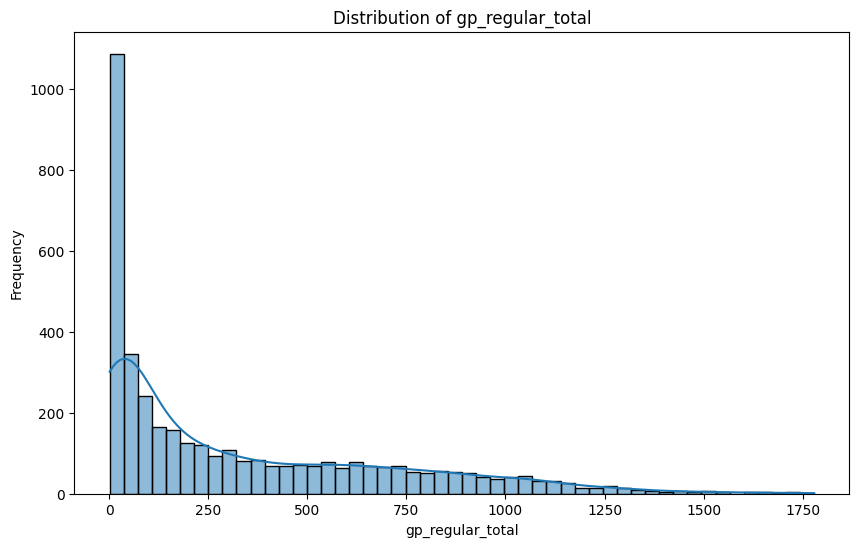

In [78]:
# Visualize the distribution of gp_regular_total
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(nhl_career_stats['gp_regular_total'], bins=50, kde=True)
plt.title('Distribution of gp_regular_total')
plt.xlabel('gp_regular_total')
plt.ylabel('Frequency')
plt.show()

In [81]:
# Write to CSV
nhl_career_stats.to_csv('../dataset/nhl_players_career_stats.csv', index=False)

## Exclude Rookies
- Only include players who surpass rookie eligibility (Calder Memorial Trophy) limits:

    1. players must be 26 years old or younger by September 15th of the season in question.

    2. played $\geq 25$ NHL games in a single season, or

    3. played $ \leq 6$ NHL games in any two previous seasons.

    - In modern practice, only NHL experience is practically considered.

        - International pro league (KHL, SHL, Liiga, etc.) do *not disqualify* players from Calder Trophy eligibility.



In [92]:
# Load Metadata
nhl_players_metadata = pd.read_csv('../dataset/nhl_players_metadata_facts_merged_final.csv')

# Parse the age_by_2025 using date_of_birth (MM/DD/YYYY)
nhl_players_metadata['age_by_2025'] = pd.to_datetime(nhl_players_metadata['date_of_birth'], format='%m/%d/%Y').apply(lambda x: int((pd.Timestamp('2025-09-15') - x).days // 365))

In [93]:
# Load Career Stats
nhl_career_stats = pd.read_csv('../dataset/nhl_players_career_stats.csv')

In [94]:
# Merge Career Stats and Metadata
nhl_players = nhl_career_stats.merge(nhl_players_metadata, on=['player_id', 'player_name_official'], how='left')
nhl_players

,player_id,player_name_official,seasons_played,gp_regular_total,gp_regular_min_per_season,gp_regular_max_per_season,seasons_with_gp_over_6,g_regular_sum,a_regular_sum,p_regular_sum,...,nation,height_cm,weight_kg,shoots,player_type,nhl_rights,draft,highlights,description,age_by_2025
0,1.0,Joe Sakic,20,1378.0,15.0,84.0,20,625.0,1016.0,1641.0,...,Canada,180,88,L,NaN,NaN,"('1', '15', '1987')","['1-time U20 WJC Gold Medal', '1-time World Ch...",Brother: Brian Sakic\r\nSons: Chase Sakic & Mi...,56
1,2.0,Peter Forsberg,13,708.0,2.0,82.0,12,249.0,636.0,885.0,...,Sweden,185,93,L,"['Cerebral Tactician', 'Playmaker', 'Two-Way C...",NaN,"('1', '6', '1991')","['1-time TV-Pucken Gold Medal', '1-time J18 SM...",Arguably the greatest Swedish forward to ever ...,52
2,3.0,Milan Hejduk,14,1020.0,29.0,82.0,14,375.0,430.0,805.0,...,Czechia / USA,183,87,R,['Sniper'],NaN,"('4', '87', '1994')","['1-time Olympic Gold Medal', '1-time World Ch...",Father: Milan Hejduk\r\nCousin: Tomas Hejduk\r...,49
3,4.0,Alex Tanguay,16,1088.0,16.0,82.0,16,283.0,580.0,863.0,...,Canada,185,88,L,['Playmaker'],NaN,"('1', '12', '1998')","['1-time CHL All-Rookie Team', '1-time NHL Sta...",Brother: Maxime Tanguay\r\nCousin: Tyler Tangu...,45
4,5.0,Chris Drury,12,892.0,24.0,82.0,12,255.0,360.0,615.0,...,USA,178,86,R,NaN,NaN,"('3', '72', '1994')","['2-time Olympic Silver Medal', '1-time World ...",Son: Luke Drury\r\nBrothers: Ted Drury & Jim D...,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921,3922.0,Calum Ritchie,1,7.0,7.0,7.0,1,1.0,0.0,1.0,...,Canada,188,86,R,"['Playmaker', 'Puckhandler', 'Two-Way Center']",New York Islanders / Signed,"('1', '27', '2023')","['1-time Hlinka Gretzky Cup Gold Medal', '1-ti...",Ritchie’s hockey sense is his defining quality...,20
3922,3925.0,Daniil Misyul,1,1.0,1.0,1.0,0,0.0,0.0,0.0,...,Russia / Belarus,191,89,L,NaN,NaN,"('3', '70', '2019')","['1-time U20 WJC Silver Medal', '1-time U17 WH...",Brother: Oleg Misyul,24
3923,3926.0,Nate Clurman,1,1.0,1.0,1.0,0,0.0,0.0,0.0,...,USA,188,93,R,['Defensive Defenseman'],Montréal Canadiens / Signed,"('6', '161', '2016')",['1-time NCAA (B1G) Champion'],NaN,27
3924,3927.0,Jacob Gaucher,1,4.0,4.0,4.0,0,0.0,0.0,0.0,...,Canada,191,84,R,NaN,Philadelphia Flyers / Signed,NaN,[],Father: Yannick Gaucher Brother: Nathan Gaucher,24


In [95]:
# Write to CSV
nhl_players.to_csv('../dataset/preprocess/nhl_players_career_stats_with_metadata.csv', index=False)

In [96]:
# Condition 1: Age eligibility
cond_age = nhl_players['age_by_2025'] <= 26

# Condition 2: Must NOT have played >= 25 games in any prior season
cond_single_season = nhl_players['gp_regular_max_per_season'] < 25

# Condition 3: Must NOT have played > 6 games in two or more previous seasons
cond_two_seasons = nhl_players['seasons_with_gp_over_6'] < 2

# Combine conditions
rookies_players_id = nhl_players[
    cond_age & cond_single_season & cond_two_seasons
]['player_id']

rookies_players_id

272      273.0
280      281.0
281      282.0
285      286.0
303      304.0
         ...  
3918    3919.0
3919    3920.0
3921    3922.0
3922    3925.0
3924    3927.0
Name: player_id, Length: 184, dtype: float64

In [97]:
# Remove rookies from nhl_players
nhl_players_without_rookies = nhl_players[~nhl_players['player_id'].isin(rookies_players_id)]
nhl_players_without_rookies

,player_id,player_name_official,seasons_played,gp_regular_total,gp_regular_min_per_season,gp_regular_max_per_season,seasons_with_gp_over_6,g_regular_sum,a_regular_sum,p_regular_sum,...,nation,height_cm,weight_kg,shoots,player_type,nhl_rights,draft,highlights,description,age_by_2025
0,1.0,Joe Sakic,20,1378.0,15.0,84.0,20,625.0,1016.0,1641.0,...,Canada,180,88,L,NaN,NaN,"('1', '15', '1987')","['1-time U20 WJC Gold Medal', '1-time World Ch...",Brother: Brian Sakic\r\nSons: Chase Sakic & Mi...,56
1,2.0,Peter Forsberg,13,708.0,2.0,82.0,12,249.0,636.0,885.0,...,Sweden,185,93,L,"['Cerebral Tactician', 'Playmaker', 'Two-Way C...",NaN,"('1', '6', '1991')","['1-time TV-Pucken Gold Medal', '1-time J18 SM...",Arguably the greatest Swedish forward to ever ...,52
2,3.0,Milan Hejduk,14,1020.0,29.0,82.0,14,375.0,430.0,805.0,...,Czechia / USA,183,87,R,['Sniper'],NaN,"('4', '87', '1994')","['1-time Olympic Gold Medal', '1-time World Ch...",Father: Milan Hejduk\r\nCousin: Tomas Hejduk\r...,49
3,4.0,Alex Tanguay,16,1088.0,16.0,82.0,16,283.0,580.0,863.0,...,Canada,185,88,L,['Playmaker'],NaN,"('1', '12', '1998')","['1-time CHL All-Rookie Team', '1-time NHL Sta...",Brother: Maxime Tanguay\r\nCousin: Tyler Tangu...,45
4,5.0,Chris Drury,12,892.0,24.0,82.0,12,255.0,360.0,615.0,...,USA,178,86,R,NaN,NaN,"('3', '72', '1994')","['2-time Olympic Silver Medal', '1-time World ...",Son: Luke Drury\r\nBrothers: Ted Drury & Jim D...,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,3916.0,Milos Kelemen,2,24.0,10.0,14.0,2,1.0,1.0,2.0,...,Slovakia,188,99,L,NaN,NaN,NaN,"['1-time Olympic Bronze Medal', '1-time Czech ...",NaN,26
3917,3918.0,Nikolai Kovalenko,1,57.0,28.0,29.0,1,7.0,13.0,20.0,...,Russia / USA,179,82,L,NaN,NaN,"('6', '171', '2018')","['1-time U17 WHC Silver Medal', '1-time WJAC-1...",Father: Andrei Kovalenko\r\nBrothers: Danila K...,25
3920,3921.0,Patrik Koch,1,1.0,1.0,1.0,0,0.0,0.0,0.0,...,Slovakia,186,86,L,"['Defensive Defenseman', 'Physical Defenseman']",NaN,NaN,[],NaN,28
3923,3926.0,Nate Clurman,1,1.0,1.0,1.0,0,0.0,0.0,0.0,...,USA,188,93,R,['Defensive Defenseman'],Montréal Canadiens / Signed,"('6', '161', '2016')",['1-time NCAA (B1G) Champion'],NaN,27


In [98]:
# Write to CSV
nhl_players_without_rookies.to_csv('../dataset/preprocess/nhl_players_career_stats_with_metadata_without_rookies.csv', index=False)

## Exclude Fringe Players

- Fringe Players are defined as:

    1. players who have played less than 2 seasons in the NHL, or

    2. players who have not played in at least 41 games in a single season.

In [113]:
# Load NHL Players without Rookies
nhl_players_without_rookies = pd.read_csv('../dataset/preprocess/nhl_players_career_stats_with_metadata_without_rookies.csv')

In [120]:
nhl_players_without_rookies.shape

(3742, 55)

In [116]:
# Condition 1: played less than 2 seasons
cond_seasons = nhl_players_without_rookies['seasons_played'] < 2

# Condition 2: never played ≥ 41 games in a single season
cond_gp = nhl_players_without_rookies['gp_regular_max_per_season'] < 41

# Combine conditions (must satisfy both)
fringe_players_id = nhl_players_without_rookies[
    cond_seasons | cond_gp
]['player_id']


In [117]:
fringe_players_id

25        26.0
26        27.0
27        28.0
37        38.0
38        39.0
         ...  
3737    3916.0
3738    3918.0
3739    3921.0
3740    3926.0
3741    3928.0
Name: player_id, Length: 1304, dtype: float64

In [118]:
# Remove fringe players from nhl_players_without_rookies
nhl_players_without_rookies_and_fringe = nhl_players_without_rookies[~nhl_players_without_rookies['player_id'].isin(fringe_players_id)]

In [119]:
nhl_players_without_rookies_and_fringe

,player_id,player_name_official,seasons_played,gp_regular_total,gp_regular_min_per_season,gp_regular_max_per_season,seasons_with_gp_over_6,g_regular_sum,a_regular_sum,p_regular_sum,...,nation,height_cm,weight_kg,shoots,player_type,nhl_rights,draft,highlights,description,age_by_2025
0,1.0,Joe Sakic,20,1378.0,15.0,84.0,20,625.0,1016.0,1641.0,...,Canada,180,88,L,NaN,NaN,"('1', '15', '1987')","['1-time U20 WJC Gold Medal', '1-time World Ch...",Brother: Brian Sakic\r\nSons: Chase Sakic & Mi...,56
1,2.0,Peter Forsberg,13,708.0,2.0,82.0,12,249.0,636.0,885.0,...,Sweden,185,93,L,"['Cerebral Tactician', 'Playmaker', 'Two-Way C...",NaN,"('1', '6', '1991')","['1-time TV-Pucken Gold Medal', '1-time J18 SM...",Arguably the greatest Swedish forward to ever ...,52
2,3.0,Milan Hejduk,14,1020.0,29.0,82.0,14,375.0,430.0,805.0,...,Czechia / USA,183,87,R,['Sniper'],NaN,"('4', '87', '1994')","['1-time Olympic Gold Medal', '1-time World Ch...",Father: Milan Hejduk\r\nCousin: Tomas Hejduk\r...,49
3,4.0,Alex Tanguay,16,1088.0,16.0,82.0,16,283.0,580.0,863.0,...,Canada,185,88,L,['Playmaker'],NaN,"('1', '12', '1998')","['1-time CHL All-Rookie Team', '1-time NHL Sta...",Brother: Maxime Tanguay\r\nCousin: Tyler Tangu...,45
4,5.0,Chris Drury,12,892.0,24.0,82.0,12,255.0,360.0,615.0,...,USA,178,86,R,NaN,NaN,"('3', '72', '1994')","['2-time Olympic Silver Medal', '1-time World ...",Son: Luke Drury\r\nBrothers: Ted Drury & Jim D...,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,3889.0,Matt Jones,3,106.0,16.0,45.0,3,1.0,10.0,11.0,...,USA,183,98,L,NaN,NaN,"('3', '80', '2002')",['1-time USHL Clark Cup Champion'],Brother: Zach Jones,42
3718,3896.0,Boris Valabik,3,80.0,7.0,50.0,3,0.0,7.0,7.0,...,Slovakia,201,105,L,"['Defensive Defenseman', 'Enforcer', 'Heavy Hi...",NaN,"('1', '10', '2004')","['1-time U18 WJC Silver Medal', '1-time AHL Ca...",A defenseman with a physical style. Useful in ...,39
3719,3897.0,Viktor Tikhonov,2,111.0,11.0,61.0,2,11.0,11.0,22.0,...,Russia,187,87,R,NaN,NaN,"('1', '28', '2008')","['1-time World Championship Gold Medal', '1-ti...",Tikhonov is a forward with fine offensive abil...,37
3732,3910.0,Mario Kempe,2,70.0,18.0,52.0,2,6.0,7.0,13.0,...,Sweden,183,86,L,NaN,NaN,"('5', '122', '2007')",['1-time U20 WJC Silver Medal'],Kempe is very good skater with good accelerati...,37


In [108]:
# Write to CSV
nhl_players_without_rookies_and_fringe.to_csv('../dataset/preprocess/nhl_players_career_stats_with_metadata_without_rookies_and_fringe.csv', index=False)

## Divde Players into Forwards and Defensemen

In [121]:
# Load NHL Players without Rookies and Fringe Players
nhl_players_without_rookies_and_fringe = pd.read_csv('../dataset/preprocess/nhl_players_career_stats_with_metadata_without_rookies_and_fringe.csv')

In [122]:
nhl_players_without_rookies_and_fringe

,player_id,player_name_official,seasons_played,gp_regular_total,gp_regular_min_per_season,gp_regular_max_per_season,seasons_with_gp_over_6,g_regular_sum,a_regular_sum,p_regular_sum,...,nation,height_cm,weight_kg,shoots,player_type,nhl_rights,draft,highlights,description,age_by_2025
0,1.0,Joe Sakic,20,1378.0,15.0,84.0,20,625.0,1016.0,1641.0,...,Canada,180,88,L,NaN,NaN,"('1', '15', '1987')","['1-time U20 WJC Gold Medal', '1-time World Ch...",Brother: Brian Sakic\r\nSons: Chase Sakic & Mi...,56
1,2.0,Peter Forsberg,13,708.0,2.0,82.0,12,249.0,636.0,885.0,...,Sweden,185,93,L,"['Cerebral Tactician', 'Playmaker', 'Two-Way C...",NaN,"('1', '6', '1991')","['1-time TV-Pucken Gold Medal', '1-time J18 SM...",Arguably the greatest Swedish forward to ever ...,52
2,3.0,Milan Hejduk,14,1020.0,29.0,82.0,14,375.0,430.0,805.0,...,Czechia / USA,183,87,R,['Sniper'],NaN,"('4', '87', '1994')","['1-time Olympic Gold Medal', '1-time World Ch...",Father: Milan Hejduk\r\nCousin: Tomas Hejduk\r...,49
3,4.0,Alex Tanguay,16,1088.0,16.0,82.0,16,283.0,580.0,863.0,...,Canada,185,88,L,['Playmaker'],NaN,"('1', '12', '1998')","['1-time CHL All-Rookie Team', '1-time NHL Sta...",Brother: Maxime Tanguay\r\nCousin: Tyler Tangu...,45
4,5.0,Chris Drury,12,892.0,24.0,82.0,12,255.0,360.0,615.0,...,USA,178,86,R,NaN,NaN,"('3', '72', '1994')","['2-time Olympic Silver Medal', '1-time World ...",Son: Luke Drury\r\nBrothers: Ted Drury & Jim D...,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,3907.0,Tyler Gaudet,3,20.0,2.0,14.0,1,1.0,3.0,4.0,...,Canada,191,98,L,NaN,NaN,NaN,[],2012-13 red jersey captain for Pembroke Lumber...,32
2982,3910.0,Mario Kempe,2,70.0,18.0,52.0,2,6.0,7.0,13.0,...,Sweden,183,86,L,NaN,NaN,"('5', '122', '2007')",['1-time U20 WJC Silver Medal'],Kempe is very good skater with good accelerati...,37
2983,3912.0,Victor Soderstrom,4,53.0,3.0,30.0,2,1.0,10.0,11.0,...,Sweden,184,89,R,NaN,Boston Bruins / Signed,"('1', '11', '2019')","['1-time U18 WJC Gold Medal', '1-time Hlinka G...",An uber competitive two-way defenceman who thi...,24
2984,3913.0,Dysin Mayo,2,82.0,15.0,67.0,2,4.0,8.0,12.0,...,Canada,184,86,R,NaN,NaN,"('5', '133', '2014')","['1-time U17 WHC Silver Medal', '1-time World ...",NaN,29


In [123]:
# Divide players into forwards and defensemen
nhl_defensemen_id = nhl_players_without_rookies_and_fringe[
    nhl_players_without_rookies_and_fringe['player_pos_official'] == 'D'
]['player_id']

In [124]:
nhl_defensemen_id

5          6.0
8          9.0
10        11.0
12        13.0
13        14.0
         ...  
2977    3889.0
2978    3896.0
2983    3912.0
2984    3913.0
2985    3914.0
Name: player_id, Length: 1016, dtype: float64

In [128]:
# Get Defensemen
nhl_defensemen = nhl_players_without_rookies_and_fringe[
    nhl_players_without_rookies_and_fringe['player_id'].isin(nhl_defensemen_id)
]

In [129]:
nhl_defensemen

,player_id,player_name_official,seasons_played,gp_regular_total,gp_regular_min_per_season,gp_regular_max_per_season,seasons_with_gp_over_6,g_regular_sum,a_regular_sum,p_regular_sum,...,nation,height_cm,weight_kg,shoots,player_type,nhl_rights,draft,highlights,description,age_by_2025
5,6.0,Ray Bourque,22,1612.0,14.0,82.0,22,410.0,1169.0,1579.0,...,Canada,180,98,L,"['Heavy Shooter', 'Offensive Defenseman']",NaN,"('1', '8', '1979')","['2-time Canada Cup Champion', '1-time Hockey ...",Brother: Richard Bourque\r\nSons: Chris Bourqu...,64
8,9.0,Martin Skoula,10,776.0,17.0,82.0,10,44.0,152.0,196.0,...,Czechia,190,101,L,NaN,NaN,"('1', '17', '1998')","['1-time World Championship Silver Medal', '1-...",Škoula was a big defenseman with all-around ab...,45
10,11.0,Greg De Vries,13,878.0,6.0,82.0,13,48.0,146.0,194.0,...,Canada,190,95,L,NaN,NaN,NaN,['1-time NHL Stanley Cup Champion'],Son: Luke De Vries\r\nNephew: Nate Tivey,52
12,13.0,Jon Klemm,15,773.0,4.0,82.0,13,42.0,100.0,142.0,...,Canada,188,92,R,NaN,NaN,NaN,"['1-time CHL Memorial Cup Champion', '2-time N...",NaN,55
13,14.0,Adam Foote,19,1154.0,12.0,81.0,19,66.0,242.0,308.0,...,Canada,188,103,R,['Defensive Defenseman'],NaN,"('2', '22', '1989')","['1-time Olympic Gold Medal', '1-time World Cu...","Sons: Cal Foote, Nolan Foote",54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,3889.0,Matt Jones,3,106.0,16.0,45.0,3,1.0,10.0,11.0,...,USA,183,98,L,NaN,NaN,"('3', '80', '2002')",['1-time USHL Clark Cup Champion'],Brother: Zach Jones,42
2978,3896.0,Boris Valabik,3,80.0,7.0,50.0,3,0.0,7.0,7.0,...,Slovakia,201,105,L,"['Defensive Defenseman', 'Enforcer', 'Heavy Hi...",NaN,"('1', '10', '2004')","['1-time U18 WJC Silver Medal', '1-time AHL Ca...",A defenseman with a physical style. Useful in ...,39
2983,3912.0,Victor Soderstrom,4,53.0,3.0,30.0,2,1.0,10.0,11.0,...,Sweden,184,89,R,NaN,Boston Bruins / Signed,"('1', '11', '2019')","['1-time U18 WJC Gold Medal', '1-time Hlinka G...",An uber competitive two-way defenceman who thi...,24
2984,3913.0,Dysin Mayo,2,82.0,15.0,67.0,2,4.0,8.0,12.0,...,Canada,184,86,R,NaN,NaN,"('5', '133', '2014')","['1-time U17 WHC Silver Medal', '1-time World ...",NaN,29


In [126]:
# Forwards are all others
nhl_forwards_id = nhl_players_without_rookies_and_fringe[
    ~nhl_players_without_rookies_and_fringe['player_id'].isin(nhl_defensemen_id)
]['player_id']

In [127]:
nhl_forwards_id

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
         ...  
2976    3886.0
2979    3897.0
2980    3903.0
2981    3907.0
2982    3910.0
Name: player_id, Length: 1970, dtype: float64

In [130]:
# Get Forwards
nhl_forwards = nhl_players_without_rookies_and_fringe[
    nhl_players_without_rookies_and_fringe['player_id'].isin(nhl_forwards_id)
]

In [131]:
nhl_forwards

,player_id,player_name_official,seasons_played,gp_regular_total,gp_regular_min_per_season,gp_regular_max_per_season,seasons_with_gp_over_6,g_regular_sum,a_regular_sum,p_regular_sum,...,nation,height_cm,weight_kg,shoots,player_type,nhl_rights,draft,highlights,description,age_by_2025
0,1.0,Joe Sakic,20,1378.0,15.0,84.0,20,625.0,1016.0,1641.0,...,Canada,180,88,L,NaN,NaN,"('1', '15', '1987')","['1-time U20 WJC Gold Medal', '1-time World Ch...",Brother: Brian Sakic\r\nSons: Chase Sakic & Mi...,56
1,2.0,Peter Forsberg,13,708.0,2.0,82.0,12,249.0,636.0,885.0,...,Sweden,185,93,L,"['Cerebral Tactician', 'Playmaker', 'Two-Way C...",NaN,"('1', '6', '1991')","['1-time TV-Pucken Gold Medal', '1-time J18 SM...",Arguably the greatest Swedish forward to ever ...,52
2,3.0,Milan Hejduk,14,1020.0,29.0,82.0,14,375.0,430.0,805.0,...,Czechia / USA,183,87,R,['Sniper'],NaN,"('4', '87', '1994')","['1-time Olympic Gold Medal', '1-time World Ch...",Father: Milan Hejduk\r\nCousin: Tomas Hejduk\r...,49
3,4.0,Alex Tanguay,16,1088.0,16.0,82.0,16,283.0,580.0,863.0,...,Canada,185,88,L,['Playmaker'],NaN,"('1', '12', '1998')","['1-time CHL All-Rookie Team', '1-time NHL Sta...",Brother: Maxime Tanguay\r\nCousin: Tyler Tangu...,45
4,5.0,Chris Drury,12,892.0,24.0,82.0,12,255.0,360.0,615.0,...,USA,178,86,R,NaN,NaN,"('3', '72', '1994')","['2-time Olympic Silver Medal', '1-time World ...",Son: Luke Drury\r\nBrothers: Ted Drury & Jim D...,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,3886.0,Frank Banham,4,32.0,3.0,21.0,1,9.0,2.0,11.0,...,Canada / Hungary,183,90,R,"['Heavy Shooter', 'Offensive Forward', 'Sniper']",NaN,"('6', '147', '1993')","['1-time CHL Third All-Star Team', '1-time ICE...","Cousins: Jesse Dudas, Mark Kachowski",50
2979,3897.0,Viktor Tikhonov,2,111.0,11.0,61.0,2,11.0,11.0,22.0,...,Russia,187,87,R,NaN,NaN,"('1', '28', '2008')","['1-time World Championship Gold Medal', '1-ti...",Tikhonov is a forward with fine offensive abil...,37
2980,3903.0,Andy Miele,3,15.0,1.0,7.0,2,0.0,2.0,2.0,...,USA,174,77,L,NaN,NaN,NaN,"['1-time AHL First All-Star Team', '1-time AHL...",Miele is an offensive center with good puck ha...,37
2981,3907.0,Tyler Gaudet,3,20.0,2.0,14.0,1,1.0,3.0,4.0,...,Canada,191,98,L,NaN,NaN,NaN,[],2012-13 red jersey captain for Pembroke Lumber...,32


## Write to CSV

In [132]:
# Write nhl_defensemen to CSV
nhl_defensemen.to_csv('../dataset/preprocess/nhl_defensemen.csv', index=False)

In [133]:
# Write nhl_forwards to CSV
nhl_forwards.to_csv('../dataset/preprocess/nhl_forwards.csv', index=False)